<a href="https://colab.research.google.com/github/LamaPerdu/LamaPerdu/blob/main/VinDrPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import subprocess
import os
from google.colab import drive

# 挂载 Google Drive
drive.mount('/content/drive')

# Google Drive 数据集存放路径
drive_path = "/content/drive/MyDrive/dataset"

Mounted at /content/drive


In [ ]:
import os, random, shutil
import pandas as pd
from typing import List, Dict
from tqdm import tqdm

ROOT_PATH = "/content/drive/MyDrive/dataset/physionet.org/files/vindr-mammo/1.0.0/images"
FINDING_ANNOTATIONS_DATA = "/content/drive/MyDrive/finding_annotations_filtered.csv"


selected_mass = pd.read_csv(FINDING_ANNOTATIONS_DATA)

In [ ]:
selected_mass.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,5683854eafabc34f6d854000d2ac6c2d,4ac33111294b83d43537cb8604b0808c,2f944efb1cb9579442df2d7fe6a579b7,L,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,142.899002,2171.810059,439.584991,2403.370117,test
3,5683854eafabc34f6d854000d2ac6c2d,4ac33111294b83d43537cb8604b0808c,7385e8cf7b29764525c81de4aa1aebe4,L,MLO,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,142.899002,2045.170044,417.876007,2265.879883,test
4,89524e5f372d9aff8ed43b4ef29c1435,0838a0b906894e0cc06c993426a2d143,5a94dd668eaa9865b907450c37db6ecc,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,1988.060059,1793.739990,2139.909912,1967.459961,training


1、dataframe里添加图片路径

In [ ]:
def create_path_col(df: pd.core.frame.DataFrame = selected_mass) -> List[str]:
    path_col = []
    for idx, data_row in tqdm(df.iterrows(), total=len(df)):
        study_id = str(data_row["study_id"])
        image_id = str(data_row["image_id"])
        patient_dir =  os.path.join(ROOT_PATH, study_id)
        image_name = image_id + ".png"
        image_path = os.path.join(patient_dir, image_name)
        path_col.append(image_path)
    return path_col

In [ ]:
selected_mass["image_path"] = create_path_col()

100%|██████████| 1123/1123 [00:00<00:00, 20437.56it/s]


In [ ]:
selected_mass.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split,image_path
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training,/content/drive/MyDrive/dataset/physionet.org/f...
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training,/content/drive/MyDrive/dataset/physionet.org/f...
2,5683854eafabc34f6d854000d2ac6c2d,4ac33111294b83d43537cb8604b0808c,2f944efb1cb9579442df2d7fe6a579b7,L,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,142.899002,2171.810059,439.584991,2403.370117,test,/content/drive/MyDrive/dataset/physionet.org/f...
3,5683854eafabc34f6d854000d2ac6c2d,4ac33111294b83d43537cb8604b0808c,7385e8cf7b29764525c81de4aa1aebe4,L,MLO,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,142.899002,2045.170044,417.876007,2265.879883,test,/content/drive/MyDrive/dataset/physionet.org/f...
4,89524e5f372d9aff8ed43b4ef29c1435,0838a0b906894e0cc06c993426a2d143,5a94dd668eaa9865b907450c37db6ecc,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,1988.060059,1793.739990,2139.909912,1967.459961,training,/content/drive/MyDrive/dataset/physionet.org/f...


In [ ]:
selected_mass.finding_birads.value_counts()

,count
finding_birads,
BI-RADS 3,566
BI-RADS 4,453
BI-RADS 5,104


2、dataframe里添加bbox信息

试验真实框标注

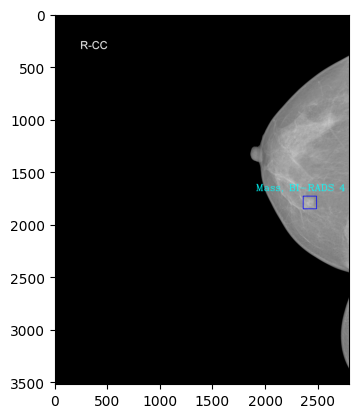

In [ ]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import numpy as np

# convert/scale/adjust annotation points to current one
original_height, original_width = selected_mass["height"][0], selected_mass["width"][0]

rescaled_xmin = int(selected_mass["xmin"].iloc[0])
rescaled_ymin = int(selected_mass["ymin"].iloc[0])
rescaled_xmax = int(selected_mass["xmax"].iloc[0])
rescaled_ymax = int(selected_mass["ymax"].iloc[0])
xx = (rescaled_xmin + rescaled_xmax) / 2
yy = (rescaled_ymin + rescaled_ymax) / 2
ww = rescaled_xmax - rescaled_xmin
hh = rescaled_ymax - rescaled_ymin

# visualize a sample image and annotation
sample = plt.imread(selected_mass["image_path"][0])
sample_bgr = cv2.cvtColor(sample, cv2.COLOR_RGB2BGR)

# Draw rectangle around the annotated area
cv2.rectangle(sample_bgr, (int(xx - (ww / 2)), int(yy - (hh / 2))),
              (int(xx + (ww / 2)), int(yy + (hh / 2))),
              (255, 0, 0), 5)

# Add text to the image
cv2.putText(sample_bgr, "Mass, " + selected_mass["finding_birads"][0], (rescaled_xmin-450, rescaled_ymin-50),
            cv2.FONT_HERSHEY_COMPLEX, 3, (255, 200, 0), 3, cv2.LINE_AA)

# Display the annotated image
plt.imshow(cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2RGB), cmap="bone", vmin=0, vmax=255)

添加groudn truth的bbox信息

In [ ]:
def add_points(df: pd.core.frame.DataFrame = selected_mass):
    x_centers, y_centers = [], []
    ann_widths, ann_heights = [], []

    for i in range(df.shape[0]):
        original_height, original_width = df["height"][i], df["width"][i]

        rescaled_xmin = df["xmin"].iloc[i]
        rescaled_ymin = df["ymin"].iloc[i]
        rescaled_xmax = df["xmax"].iloc[i]
        rescaled_ymax = df["ymax"].iloc[i]

        x_center = (rescaled_xmax + rescaled_xmin) / 2
        y_center = (rescaled_ymax + rescaled_ymin) / 2
        ann_width = (rescaled_xmax - rescaled_xmin)
        ann_height = (rescaled_ymax - rescaled_ymin)

        x_centers.append(x_center / original_width)
        y_centers.append(y_center / original_height)
        ann_widths.append(ann_width / original_width)
        ann_heights.append(ann_height / original_height)

    rescaled_bboxes = {
        "x_centers": x_centers,
        "y_centers": y_centers,
        "ann_widths": ann_widths,
        "ann_heights": ann_heights,
    }

    return rescaled_bboxes

bboxes = add_points()

selected_mass["x_centers"] = bboxes["x_centers"]
selected_mass["y_centers"] = bboxes["y_centers"]
selected_mass["ann_widths"] = bboxes["ann_widths"]
selected_mass["ann_heights"] = bboxes["ann_heights"]

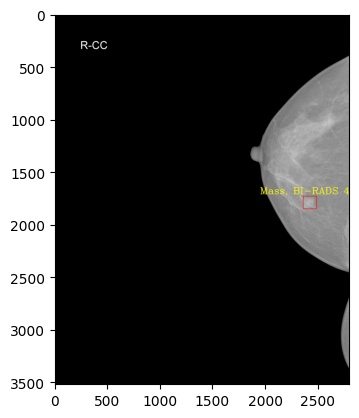

In [ ]:
# visualize a sample image and annotation
sample = plt.imread(selected_mass["image_path"][0])
sample_bgr = cv2.cvtColor(sample, cv2.COLOR_RGB2BGR)

original_w = selected_mass["width"][0]
original_h = selected_mass["height"][0]

# Calculate rectangle coordinates
xmin = int((selected_mass["x_centers"][0] - selected_mass["ann_widths"][0] / 2) * original_w)
ymin = int((selected_mass["y_centers"][0] - selected_mass["ann_heights"][0] / 2) * original_h)
xmax = int((selected_mass["x_centers"][0] + selected_mass["ann_widths"][0] / 2) * original_w)
ymax = int((selected_mass["y_centers"][0] + selected_mass["ann_heights"][0] / 2) * original_h)

# Draw rectangle around the annotated area
cv2.rectangle(sample_bgr, (xmin, ymin), (xmax, ymax), (255, 0, 0), 3)

# Add text to the image
# 设置文本参数和内容
text = "Mass, " + selected_mass["finding_birads"][0]
font = cv2.FONT_HERSHEY_COMPLEX
font_scale = 3
thickness = 3

# 获取文本尺寸
(text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)

# 初步计算文本位置（在矩形框左上角偏移一定距离）
text_x = int(xmin - 15)
text_y = int(ymin - 20)

# 调整x坐标，确保文本不会超出左边和右边边界
if text_x < 0:
    text_x = 0
elif text_x + text_width > original_w:
    text_x = original_w - text_width

# 调整y坐标，确保文本不会超出顶部和底部边界
if text_y - text_height < 0:
    text_y = text_height + baseline
elif text_y > original_h:
    text_y = original_h

# 将调整后的文本添加到图像上
cv2.putText(sample_bgr, text, (text_x, text_y), font, font_scale, (255, 200, 0), thickness, cv2.LINE_AA)

plt.imshow(sample_bgr, cmap="bone")

In [ ]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {
                "BI-RADS 3": 0,
                "BI-RADS 4": 1,
                "BI-RADS 5": 2,
              }

selected_mass["class_id"] = [class_name_to_id_mapping[bf] for bf in selected_mass["finding_birads"]]

In [ ]:
selected_mass.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,...,ymin,xmax,ymax,split,image_path,x_centers,y_centers,ann_widths,ann_heights,class_id
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],...,1731.640015,2482.979980,1852.750000,training,/content/drive/MyDrive/dataset/physionet.org/f...,0.863950,0.509436,0.045657,0.034426,1
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],...,1240.609985,2501.800049,1354.040039,training,/content/drive/MyDrive/dataset/physionet.org/f...,0.872943,0.368768,0.041114,0.032243,1
2,5683854eafabc34f6d854000d2ac6c2d,4ac33111294b83d43537cb8604b0808c,2f944efb1cb9579442df2d7fe6a579b7,L,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],...,2171.810059,439.584991,2403.370117,test,/content/drive/MyDrive/dataset/physionet.org/f...,0.104015,0.650253,0.105959,0.065822,0
3,5683854eafabc34f6d854000d2ac6c2d,4ac33111294b83d43537cb8604b0808c,7385e8cf7b29764525c81de4aa1aebe4,L,MLO,3518,2800,BI-RADS 3,DENSITY C,['Mass'],...,2045.170044,417.876007,2265.879883,test,/content/drive/MyDrive/dataset/physionet.org/f...,0.100138,0.612713,0.098206,0.062737,0
4,89524e5f372d9aff8ed43b4ef29c1435,0838a0b906894e0cc06c993426a2d143,5a94dd668eaa9865b907450c37db6ecc,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],...,1793.739990,2139.909912,1967.459961,training,/content/drive/MyDrive/dataset/physionet.org/f...,0.737137,0.534565,0.054232,0.049380,0
